In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re

## Data gathering

In [2]:
#read csv file as given 
twt = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# download the file from given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_predictions.tsv','wb').write(response.content)

335079

In [5]:
images = pd.read_csv('image_predictions.tsv',sep='\t')

In [6]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API keys - to be removed at project submission

In [7]:
consumer_key = HIDDEN
consumer_secret = HIDDEN
access_token = HIDDEN
access_secret = HIDDEN

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True)

In [8]:
jsons = {}
twt_ids = twt.tweet_id
for i in twt_ids:
    try:
        stats = api.get_status(i)
        jsons[i]=stats._json
    except:
        print("Exception for: "+str(i))

Exception for: 888202515573088257
Exception for: 873697596434513921
Exception for: 872668790621863937
Exception for: 872261713294495745
Exception for: 869988702071779329
Exception for: 866816280283807744
Exception for: 861769973181624320
Exception for: 856602993587888130
Exception for: 851953902622658560
Exception for: 845459076796616705
Exception for: 844704788403113984
Exception for: 842892208864923648
Exception for: 837366284874571778
Exception for: 837012587749474308
Exception for: 829374341691346946
Exception for: 827228250799742977
Exception for: 812747805718642688
Exception for: 802247111496568832
Exception for: 779123168116150273
Exception for: 775096608509886464
Exception for: 770743923962707968


Rate limit reached. Sleeping for: 477


Exception for: 754011816964026368
Exception for: 680055455951884288


Rate limit reached. Sleeping for: 510


In [9]:
with open('tweet_json.txt','w') as outfile:
    json.dump(jsons,outfile,sort_keys = True, indent = 4, ensure_ascii=True)

In [10]:
twt_jsons = pd.read_json('tweet_json.txt',orient='index')
twt_jsons.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2471,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,477,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'can_media_tag': True, 'contributors_enabled'..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,122,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,45,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'can_media_tag': True, 'contributors_enabled'..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,118,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'can_media_tag': True, 'contributors_enabled'..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,279,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,135,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'can_media_tag': True, 'contributors_enabled'..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,99,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'can_media_tag': True, 'contributors_enabled'..."


## Data assessment 

In [11]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twt.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twt.loc[(twt['rating_denominator']!=10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
twt.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twt.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twt.name.sample()

1936    one
Name: name, dtype: object

In [17]:
twt.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Bailey        7
Toby          7
Daisy         7
Buddy         7
Bella         6
Stanley       6
Jack          6
Dave          6
Koda          6
Scout         6
Jax           6
Milo          6
Rusty         6
Leo           6
Oscar         6
Phil          5
           ... 
Obi           1
Zoe           1
Malikai       1
Callie        1
Eevee         1
Deacon        1
Raphael       1
Barry         1
Superpup      1
Devón         1
Dug           1
Kaia          1
Tuco          1
Tuck          1
Kenzie        1
Blu           1
Stormy        1
Lizzie        1
Tilly         1
Ralphé        1
Geoff         1
Carper        1
Rizzo         1
Snoopy        1
Pancake       1
Hazel         1
Kloey         1
Biden         1
Iggy          1
Loomis        1
Name: name, Length: 957,

In [18]:
# View rows where the value of 'name' is lowercase and the word 'named' appears in the 'text' column which indicates 
# there is an actual dog name in the text
twt.loc[(twt['name'].str.islower()) & (twt['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [19]:
# Check situation where the value of 'name' is lowercase and the words 'name is' appears in the 'text' column which indicates 
# there is an actual dog name in the text
twt.loc[(twt['name'].str.islower()) & (twt['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [20]:
# View row where dog name is 'O' but we can see in the 'text' column that the dog's name is actually 'O'Malley' 
twt[twt.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [21]:
twt.retweeted_status_id.sample()

1849   NaN
Name: retweeted_status_id, dtype: float64

In [22]:
twt.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twt.expanded_urls.sample(5)

2174    https://twitter.com/dog_rates/status/669216679...
1610    https://twitter.com/dog_rates/status/685532292...
1274    https://twitter.com/dog_rates/status/709198395...
1776                        https://vine.co/v/iKuMDuYV0aZ
649     https://twitter.com/dog_rates/status/792913359...
Name: expanded_urls, dtype: object

In [24]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
images.jpg_url.sample(5)

1971    https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg
1310    https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg
279     https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg
259     https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg
1652    https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg
Name: jpg_url, dtype: object

In [26]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [29]:
twt_jsons.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2333 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2333 non-null datetime64[ns]
entities                         2333 non-null object
extended_entities                1818 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null int64
geo                              0 non-null float64
id                               2333 non-null int64
id_str                           2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [30]:
twt_jsons.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2333.000000,2333.0,0.0,2.333000e+03,2.333000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2333.000000,2199.0,2199.0,2.600000e+01,2.600000e+01,2333.000000,2333.0,2333.000000
mean,NaN,NaN,7711.215174,0.0,NaN,7.419279e+17,7.419279e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013288,0.0,0.0,8.113972e+17,8.113972e+17,2776.290613,0.0,0.105015
std,NaN,NaN,11969.894003,0.0,NaN,6.820607e+16,6.820607e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114528,0.0,0.0,6.295843e+16,6.295843e+16,4699.277216,0.0,0.306638
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,1.000000,0.0,0.000000
25%,NaN,NaN,1337.000000,0.0,NaN,6.782786e+17,6.782786e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,559.000000,0.0,0.000000
50%,NaN,NaN,3357.000000,0.0,NaN,7.184547e+17,7.184547e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1299.000000,0.0,0.000000
75%,NaN,NaN,9467.000000,0.0,NaN,7.986654e+17,7.986654e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3228.000000,0.0,0.000000
max,NaN,NaN,159756.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,79768.000000,0.0,1.000000


In [31]:
twt_jsons.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.558181e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
7.468859e+17    1
               ..
8.380855e+17    1
8.008580e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [32]:
twt_jsons.in_reply_to_status_id_str.value_counts()

6.671522e+17    2
8.558181e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
7.468859e+17    1
               ..
8.380855e+17    1
8.008580e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [33]:
twt_jsons.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.281182e+09     1
3.105441e+09     1
2.918590e+08     1
3.589728e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
8.405479e+17     1
2.894131e+09     1
2.916630e+07     1
2.143566e+07     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [34]:
twt_jsons.in_reply_to_user_id_str.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.281182e+09     1
3.105441e+09     1
2.918590e+08     1
3.589728e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
8.405479e+17     1
2.894131e+09     1
2.916630e+07     1
2.143566e+07     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id_str, dtype: int64

In [35]:
twt_jsons.quoted_status_id.value_counts()

8.065709e+17    1
8.389487e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.413114e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id, dtype: int64

In [36]:
twt_jsons.quoted_status_id_str.value_counts()

8.065709e+17    1
8.389487e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.413114e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id_str, dtype: int64

In [37]:
twt_jsons.retweeted_status.value_counts()

{'contributors': None, 'coordinates': None, 'created_at': 'Fri Nov 20 03:41:59 +0000 2015', 'entities': {'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/r7XzeQZWzb', 'expanded_url': 'https://twitter.com/dogratingrating/status/667548415174144001/photo/1', 'features': {'large': {'faces': []}, 'medium': {'faces': []}, 'orig': {'faces': []}, 'small': {'faces': []}}, 'id': 667548406944960512, 'id_str': '667548406944960512', 'indices': [60, 83], 'media_url': 'http://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg', 'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 575}, 'medium': {'h': 1024, 'resize': 'fit', 'w': 575}, 'small': {'h': 680, 'resize': 'fit', 'w': 382}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/r7XzeQZWzb'}], 'symbols': [], 'urls': [], 'user_mentions': []}, 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/r7XzeQZWzb', 'expanded_url': 'https://

In [38]:
# check duplicate columns 
all_columns = pd.Series(list(twt) + list(twt_jsons) + list(images))
all_columns[all_columns.duplicated()]

28    in_reply_to_status_id
30      in_reply_to_user_id
43                   source
44                     text
47                 tweet_id
dtype: object

In [39]:
twt_jsons.id.sample()

1992-06-01 05:38:20.785885184    707377100785885184
Name: id, dtype: int64

In [40]:
twt_jsons.id_str.sample()

1996-12-29 12:09:45.021730816    851861385021730816
Name: id_str, dtype: int64

In [41]:
twt_jsons.possibly_sensitive.value_counts()

0.0    2199
Name: possibly_sensitive, dtype: int64

In [42]:
twt_jsons.possibly_sensitive_appealable.value_counts()

0.0    2199
Name: possibly_sensitive_appealable, dtype: int64

In [43]:
twt_jsons.retweeted.value_counts()

0    2333
Name: retweeted, dtype: int64

In [44]:
twt_jsons.truncated.value_counts()

0    2088
1     245
Name: truncated, dtype: int64

In [45]:
twt_jsons.user.value_counts()

{'can_media_tag': True, 'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHSfPq'}]}}, 'favourites_count': 143630, 'follow_request_sent': False, 'followed_by': False, 'followers_count': 8478251, 'following': False, 'friends_count': 14, 'geo_enabled': True, 'has_extended_profile': False, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': None, 'listed_count': 6663, 'location': '「 DM YOUR DOGS 」', 'name': 'WeRateDogs®', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com

In [46]:
# check duplicates
twt[twt.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [47]:
# check duplicates
images[images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues
1. In the Twitter archive and Twitter JSON file, some tweets are retweets and not original
2. In the Twitter archive file, retweeted_status_user_id and retweeted_status_timestamp are useless - this study analyzes only original tweets
3. Timestamp in the twitter archive file should be timestamp object instead of strings  
4. Some Tweets in the Twitter archive file are missing pictures.
5. In Twitter archive file, contents of 'text' cutoff due to insufficient column width
6. In Twitter archive file, some dog names aren't extracted properly 
7. In Twitter archive file, missing name should be labled as 'NaN' instead of 'None'
8. In Twitter archive file, rating numerators and denominators should be float instead of integers
9. In Twitter archive file, some rating numerators and denominators aren't extracted properly 
10. In Twitter archive file, one tweet doesn't have rating.
11. in Twitter JSON file, contributors, coordinates, geo are empty columns 


### Tidy issues

1. In Twitter archive file, dog type (dogger, floofer etc) are variables. They should have been varaibles under the same column.
2. In Twitter JSON file, in_reply_to_status_id and in_reply_to_status_id_str are the same. Only one column should be left. The same is true with in_reply_to_user_id_str and in_reply_to_user_id,  quoted_status_id and quoted_status_id_str.
3. There should be one single dataset instead of three 
4. There are duplicate columns in the three tables -  in_reply_to_status_id, in_reply_to_user_id, source, text, tweet_id



## Data cleaning

In [48]:
twt_temp = twt.copy()
images_temp = images.copy()
twt_jsons_temp = twt_jsons.copy()

#### Define issue - tidiness issue 1 - in Twitter archive file, dog type (dogger, floofer etc) are variables. They should have been varaibles under the same column.

Solution - add a new dog_type column and remove the individual variable columns from dataframe

Test - check to see if the necessary changes have been made

In [49]:
twt_temp['dog_type'] = twt_temp['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

columns = ['doggo', 'floofer', 'pupper', 'puppo']
twt_temp = twt_temp.drop(columns, axis=1)

In [50]:
twt_temp.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Define issue - quality issue 1 - some Tweets in the Twitter archive file are not original and are retweets
Solution: remove retweets from the twitter archive file

Test: check if there are still any retweets left in the cleaned-up file 

In [51]:
# clean up the Twitter archive file
twt_temp = twt_temp[pd.isnull(twt_temp.retweeted_status_user_id)]
print(sum(twt_temp.retweeted_status_user_id.value_counts()))

0


In [52]:
# clean up the Twitter JSON file
twt_jsons_temp = twt_jsons_temp[pd.isnull(twt_jsons_temp.retweeted_status)]
print(sum(twt_jsons_temp.retweeted_status.value_counts()))

0


##### Define issue - quality issue 2 - Retweeted_status column in the Twitter JSON file and retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_id columns in the twitter archive are useless - this study analyzes only original tweets

Solution: drop these columns

Test: check if these columns are dropped

In [53]:
# clean and check the twitter JSON file 
twt_jsons_temp.drop('retweeted_status',axis=1,inplace=True)
twt_jsons_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2168 non-null datetime64[ns]
entities                         2168 non-null object
extended_entities                1744 non-null object
favorite_count                   2168 non-null int64
favorited                        2168 non-null int64
geo                              0 non-null float64
id                               2168 non-null int64
id_str                           2168 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

In [54]:
# clean and check the twitter archive file 
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twt_temp.drop(columns, axis=1,inplace=True)
twt_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


##### Define issue - quality issue 3 - Timestamp in the twitter archive file should be timestamp object instead of strings 

Solution: change convert timestamp column from strings to real DateTime object

Test: check the column data type

In [55]:
# convert timestamp column from strings to real DateTime objects
twt_temp['timestamp']=pd.to_datetime(twt_temp['timestamp'])

In [56]:
twt_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


#### Define issue - quality issue 4 - Some Tweets in the Twitter archive file are missing pictures.

Solution: remove tweets without pictures, i.e. expanded url

Test: check if all tweets in the twitter archive file has expanded url, i.e. image

In [57]:
twt_temp = twt_temp.dropna(subset=['expanded_urls'])
sum(twt_temp['expanded_urls'].isnull())

0

##### Define issue - quality issue 5 - In Twitter archive file, contents of 'text' cutoff due to insufficient column width 

Solution: Set column width to infinite so entire content of 'text' column is displayed

Test: try a few samples and see if changes have been applied

In [58]:
pd.set_option('display.max_colwidth', -1)
twt_temp.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,NaN
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf https://t.co/R5Z6jBTdhc,https://twitter.com/dog_rates/status/669324657376567296/photo/1,11,10,Ralf,NaN
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,10,None,NaN
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,NaN
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oscar. He can wave. Friendly af. 12/10 would totally wave back (IG: Oscar.is.bear) https://t.co/waN6EW0wfM,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,NaN
2215,668542336805281792,NaN,NaN,2015-11-22 21:31:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3,https://twitter.com/dog_rates/status/668542336805281792/photo/1,10,10,None,NaN
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He doesn't know how to shoe. 9/10 damn it Larry https://t.co/jMki5GOV3y,https://twitter.com/dog_rates/status/673688752737402881/photo/1,9,10,Larry,NaN
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet General. He wasn't content with the quality of his room. Requested to pupgrade, but was ignored. 14/10 look who just lost a customer https://t.co/NP5JW8LnmW",https://twitter.com/dog_rates/status/852226086759018497/video/1,14,10,General,NaN
827,769212283578875904,NaN,NaN,2016-08-26 16:37:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is DonDon. He's way up but doesn't feel blessed. Rather uncomfortable actually. 12/10 I'll save you DonDon https://t.co/OCYLz3fjVE,https://twitter.com/dog_rates/status/769212283578875904/photo/1,12,10,DonDon,NaN
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,https://twitter.com/dog_rates/status/720775346191278080/photo/1,10,10,Berkeley,NaN


##### Define - quality issue 6 - some dog names aren't properly extracted from the text

Solution: make changes when necessary

Test: check all names see if still anormalies 

In [59]:
# list scenarios whereby names are incorrectly extracted 
wrong_names1 = twt_temp.loc[(twt_temp['name'].str.islower()) & (twt_temp['text'].str.contains('named'))]
wrong_names2 = twt_temp.loc[(twt_temp['name'].str.islower()) & (twt_temp['text'].str.contains('name is'))]
wrong_names3= twt_temp.loc[(twt_temp['name'].str.islower())]
twt[twt.name == "O"]
# Save these locations as lists
wrong_names1_list = wrong_names1['text'].tolist()
wrong_names2 = wrong_names2['text'].tolist()
wrong_names3 = wrong_names3['text'].tolist()

# Correct lowercase names that have the words 'named' appear in 'text' and set the 'name' 
# Set name as what appears after 'named'
for entry in wrong_names1_list:
    mask = twt_temp.text == entry
    name_column = 'name'
    twt_temp.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# Correct lowercase names whereby the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'    
for entry in wrong_names2:
    mask = twt_temp.text == entry
    name_column = 'name'
    twt_temp.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in wrong_names3:
    mask = twt_temp.text == entry
    name_column = 'name'
    twt_temp.loc[mask, name_column] = "None"
    
# Replace "O" with "O'Malley"
twt_temp.name = twt_temp.name.replace("O", "O'Malley")

In [60]:
twt_temp.name.value_counts()

None        726
Charlie     11 
Lucy        11 
Oliver      10 
Cooper      10 
Penny       9  
Tucker      9  
Winston     8  
Lola        8  
Sadie       8  
Daisy       7  
Toby        7  
Oscar       6  
Koda        6  
Bailey      6  
Jax         6  
Bo          6  
Bella       6  
Stanley     6  
Leo         5  
Chester     5  
Rusty       5  
Louis       5  
Dave        5  
Bentley     5  
Milo        5  
Buddy       5  
Scout       5  
Gary        4  
Oakley      4  
           ..  
Al          1  
Brady       1  
Combo       1  
Cheesy      1  
Nollie      1  
Iggy        1  
Biden       1  
Terrance    1  
Fido        1  
Bertson     1  
Seamus      1  
Tyrone      1  
Devón       1  
Kaia        1  
Tuco        1  
Happy       1  
Tuck        1  
Kenzie      1  
Blu         1  
Stormy      1  
Lizzie      1  
Tilly       1  
Geoff       1  
Carper      1  
Rizzo       1  
Snoopy      1  
Pancake     1  
Hazel       1  
Kloey       1  
Loomis      1  
Name: name, Length: 931,

In [61]:
twt_temp.loc[(twt_temp['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


##### Define issues - Quality issue 7- missing names shouldn't be shown as 'None'

Solution: change 'None' to NaN

Test: see if the change has been applied by .info()

In [62]:
twt_temp.name = twt_temp.name.replace('None',np.NaN)
twt_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1391 non-null object
dog_type                 356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 198.5+ KB


##### Define: quality issue 8 - numerators and denominators are integers and should be float

Solution: change data type to float

Test: check if the changes have been applied

In [63]:
twt_temp['rating_numerator'] = twt_temp['rating_numerator'].astype('float')
twt_temp['rating_denominator'] = twt_temp['rating_denominator'].astype('float')
twt_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns, UTC]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     1391 non-null object
dog_type                 356 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(5)
memory usage: 198.5+ KB


##### Define: quality issue 9 - some numerators and denominators aren't properly extracted

Solution: get the tweets with such issue and correct those manually 

Test: check the tweets in question and see if all have been properly updated

In [64]:
# view tweets with decimal rating 
twt_temp[twt_temp.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,NaN,pupper


In [65]:
# manually correct the rating numerators and denominators to the correct data
twt_temp.loc[(twt_temp['tweet_id'] == 883482846933004288) & (twt_temp['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twt_temp.loc[(twt_temp['tweet_id'] == 786709082849828864) & (twt_temp['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twt_temp.loc[(twt_temp['tweet_id'] == 778027034220126208) & (twt_temp['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twt_temp.loc[(twt_temp['tweet_id'] == 680494726643068929) & (twt_temp['rating_numerator'] == 26), ['rating_numerator']] = 11.26


In [66]:
twt_temp[twt_temp.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,pupper


In [67]:
# identify tweets with multiple '/' and find the propert one
twt_temp[twt_temp.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,NaN,NaN
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10.0,10.0,Bookstore,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10.0,10.0,Travis,NaN
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9.0,10.0,Socks,NaN
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4.0,10.0,NaN,NaN
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10.0,10.0,Oliviér,NaN
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you s

In [68]:
# manually correct the rating numerators and denominators based on the text 
twt_temp.loc[(twt_temp['tweet_id'] == 740373189193256964) & (twt_temp['rating_numerator'] == 9), ['rating_numerator']] = 14
twt_temp.loc[(twt_temp['tweet_id'] == 740373189193256964) & (twt_temp['rating_denominator'] == 11), ['rating_denominator']] = 10

twt_temp.loc[(twt_temp['tweet_id'] == 722974582966214656) & (twt_temp['rating_numerator'] == 4), ['rating_numerator']] = 13
twt_temp.loc[(twt_temp['tweet_id'] == 722974582966214656) & (twt_temp['rating_denominator'] == 20), ['rating_denominator']] = 10

twt_temp.loc[(twt_temp['tweet_id'] == 716439118184652801) & (twt_temp['rating_numerator'] == 50), ['rating_numerator']] = 11
twt_temp.loc[(twt_temp['tweet_id'] == 716439118184652801) & (twt_temp['rating_denominator'] == 50), ['rating_denominator']] = 10

twt_temp.loc[(twt_temp['tweet_id'] == 682962037429899265) & (twt_temp['rating_numerator'] == 7), ['rating_numerator']] = 10
twt_temp.loc[(twt_temp['tweet_id'] == 682962037429899265) & (twt_temp['rating_denominator'] == 11), ['rating_denominator']] = 10

twt_temp.loc[(twt_temp['tweet_id'] == 666287406224695296) & (twt_temp['rating_numerator'] == 1), ['rating_numerator']] = 9
twt_temp.loc[(twt_temp['tweet_id'] == 666287406224695296) & (twt_temp['rating_denominator'] == 2), ['rating_denominator']] = 10

In [69]:
twt_temp[twt_temp.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,NaN,NaN
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10.0,10.0,Bookstore,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10.0,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,NaN
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10.0,10.0,Travis,NaN
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9.0,10.0,Socks,NaN
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4.0,10.0,NaN,NaN
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10.0,10.0,Oliviér,NaN
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you

In [70]:
twt_temp.rating_numerator.value_counts()

12.00      489
10.00      437
11.00      418
13.00      296
9.00       154
8.00       98 
7.00       51 
14.00      41 
5.00       33 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
0.00       2  
13.50      1  
24.00      1  
84.00      1  
143.00     1  
420.00     1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
121.00     1  
9.75       1  
99.00      1  
204.00     1  
45.00      1  
165.00     1  
1776.00    1  
80.00      1  
Name: rating_numerator, dtype: int64

In [71]:
twt_temp.loc[(twt_temp['rating_numerator']==1776)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN


In [72]:
# check to see if the large rating numerators were caused by extraction error or they were real user input
twt_temp.loc[(twt_temp['rating_numerator']>100)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,NaN
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,NaN,doggo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130.0,NaN,pupper
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110.0,NaN,pupper
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,NaN,NaN


In [73]:
# check if all denominators are of proper value
twt_temp.rating_denominator.value_counts()

10.0     2104
50.0     2   
80.0     2   
150.0    1   
110.0    1   
130.0    1   
70.0     1   
170.0    1   
120.0    1   
40.0     1   
90.0     1   
7.0      1   
Name: rating_denominator, dtype: int64

In [74]:
# check if the rating denominators that are not equal to 10 are real user input
twt_temp.loc[twt_temp.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,NaN,doggo
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,NaN,pupper
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,NaN,pupper
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,NaN,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,NaN,pupper
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,NaN,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130.0,NaN,pupper


##### Define: quality issue 10 - one tweet doesn't have rating in it

Solution: drop that tweet

Test: see if the tweet has been dropped

In [75]:
# tweet id is 810984652412424192
twt_temp = twt_temp[twt_temp.tweet_id != 810984652412424192]

In [76]:
# check if the tweet has been removed 
twt_temp.loc[(twt_temp['tweet_id']== 810984652412424192)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


##### Define issue - quality issue 11 -  in Twitter JSON file, contributors, coordinates, geo don't contain any value and need to be removed 

Solution: drop those columns

Test: see if the columns are dropped 

In [77]:
twt_jsons_temp.drop(['contributors','coordinates','geo'],axis=1,inplace=True)

##### Define issue - Tidiness issue 2 -  In Twitter JSON file, in_reply_to_status_id and in_reply_to_status_id_str are the same. Only one column should be left. The same is true with id, id_str, in_reply_to_user_id_str and in_reply_to_user_id,  quoted_status_id and quoted_status_id_str.

Solution - drop the columns that have _str in the column name

Test - see if the columns have been dropped

In [78]:
twt_jsons_temp.drop(['id_str','in_reply_to_status_id_str','in_reply_to_user_id_str','quoted_status_id_str'],axis=1,inplace=True)

In [79]:
twt_jsons_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 22 columns):
created_at                       2168 non-null datetime64[ns]
entities                         2168 non-null object
extended_entities                1744 non-null object
favorite_count                   2168 non-null int64
favorited                        2168 non-null int64
id                               2168 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_user_id              77 non-null float64
is_quote_status                  2168 non-null int64
lang                             2168 non-null object
place                            1 non-null object
possibly_sensitive               2110 non-null float64
possibly_sensitive_appealable    2110 non-null float64
quoted_status                    24 non-null object
quoted_status_id              

##### Define - tidiness issue 4 - duplicate columns of the three tables, including in_reply_to_status_id, in_reply_to_user_id, source, text, tweet_id

Solutions: drop the duplicate columns (excluding tweet_id) from twitter JSON file. tweet_id column will be dropped after the three tables are merged

In [80]:
twt_jsons_temp.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text'],axis=1,inplace=True)

In [81]:
twt_jsons_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 18 columns):
created_at                       2168 non-null datetime64[ns]
entities                         2168 non-null object
extended_entities                1744 non-null object
favorite_count                   2168 non-null int64
favorited                        2168 non-null int64
id                               2168 non-null int64
in_reply_to_screen_name          77 non-null object
is_quote_status                  2168 non-null int64
lang                             2168 non-null object
place                            1 non-null object
possibly_sensitive               2110 non-null float64
possibly_sensitive_appealable    2110 non-null float64
quoted_status                    24 non-null object
quoted_status_id                 25 non-null float64
retweet_count                    2168 non-null int64
retweeted                     

##### Define issue - Tidiness issue 3 - combine three datasets into one

Solution: merge the three datasets 

Tests: see if datasets are merged 

In [97]:
merged = pd.merge(left=twt_temp,right=twt_jsons_temp,
                 left_on='tweet_id',right_on='id')
merged = pd.merge(left=merged,right=images_temp,
                     left_on='tweet_id',right_on='tweet_id')

In [98]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 40 columns):
tweet_id                         1296 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1296 non-null datetime64[ns, UTC]
source                           1296 non-null object
text                             1296 non-null object
expanded_urls                    1296 non-null object
rating_numerator                 1296 non-null float64
rating_denominator               1296 non-null float64
name                             858 non-null object
dog_type                         209 non-null object
created_at                       1296 non-null datetime64[ns]
entities                         1296 non-null object
extended_entities                1157 non-null object
favorite_count                   1296 non-null int64
favorited                        1296 non-null int64
id           

In [99]:
merged.created_at.value_counts()

2016-02-15 01:05:02    1
2016-10-25 16:00:09    1
2015-12-26 23:15:17    1
2017-05-19 00:12:11    1
2016-05-27 01:47:23    1
2016-06-28 15:40:07    1
2017-05-15 19:14:50    1
2016-03-20 01:28:47    1
2016-06-18 01:33:55    1
2015-12-07 02:58:09    1
2017-07-03 00:11:11    1
2015-12-07 17:38:09    1
2015-12-22 04:35:49    1
2017-07-11 00:00:02    1
2016-10-23 00:27:05    1
2016-10-26 22:31:36    1
2015-11-27 19:11:49    1
2015-11-19 23:53:52    1
2015-12-01 03:49:23    1
2015-11-16 19:31:45    1
2016-04-04 17:53:31    1
2015-11-22 03:46:11    1
2017-01-06 17:00:38    1
2016-01-09 01:59:19    1
2017-05-02 00:04:57    1
2016-03-14 16:02:49    1
2015-12-12 16:02:36    1
2016-06-08 22:48:46    1
2017-05-12 00:46:44    1
2017-05-22 16:06:55    1
                      ..
2015-12-12 04:23:49    1
2015-11-23 03:46:18    1
2016-07-13 00:43:15    1
2016-06-13 01:06:33    1
2015-12-02 02:30:43    1
2016-09-08 20:45:53    1
2015-12-02 15:57:30    1
2015-12-09 18:59:46    1
2016-03-27 02:43:58    1


In [100]:
merged.timestamp.value_counts()

2016-02-15 01:05:02+00:00    1
2016-10-25 16:00:09+00:00    1
2015-12-26 23:15:17+00:00    1
2017-05-19 00:12:11+00:00    1
2016-05-27 01:47:23+00:00    1
2016-06-28 15:40:07+00:00    1
2017-05-15 19:14:50+00:00    1
2016-03-20 01:28:47+00:00    1
2016-06-18 01:33:55+00:00    1
2015-12-07 02:58:09+00:00    1
2017-07-03 00:11:11+00:00    1
2015-12-07 17:38:09+00:00    1
2015-12-22 04:35:49+00:00    1
2017-07-11 00:00:02+00:00    1
2016-10-23 00:27:05+00:00    1
2016-10-26 22:31:36+00:00    1
2015-11-27 19:11:49+00:00    1
2015-11-19 23:53:52+00:00    1
2015-12-01 03:49:23+00:00    1
2015-11-16 19:31:45+00:00    1
2016-04-04 17:53:31+00:00    1
2015-11-22 03:46:11+00:00    1
2017-01-06 17:00:38+00:00    1
2016-01-09 01:59:19+00:00    1
2017-05-02 00:04:57+00:00    1
2016-03-14 16:02:49+00:00    1
2015-12-12 16:02:36+00:00    1
2016-06-08 22:48:46+00:00    1
2017-05-12 00:46:44+00:00    1
2017-05-22 16:06:55+00:00    1
                            ..
2015-12-12 04:23:49+00:00    1
2015-11-

##### Tidiness - created_at and timestamp are two columns with the same content; tweet_id and id are also two columns with the same content

Solution: drop created_at and id columns 

Test: check if the two columns are dropped


In [101]:
merged.drop(['created_at','id'],axis=1,inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 38 columns):
tweet_id                         1296 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1296 non-null datetime64[ns, UTC]
source                           1296 non-null object
text                             1296 non-null object
expanded_urls                    1296 non-null object
rating_numerator                 1296 non-null float64
rating_denominator               1296 non-null float64
name                             858 non-null object
dog_type                         209 non-null object
entities                         1296 non-null object
extended_entities                1157 non-null object
favorite_count                   1296 non-null int64
favorited                        1296 non-null int64
in_reply_to_screen_name          15 non-null object
is_quote_status        

In [102]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 38 columns):
tweet_id                         1296 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1296 non-null datetime64[ns, UTC]
source                           1296 non-null object
text                             1296 non-null object
expanded_urls                    1296 non-null object
rating_numerator                 1296 non-null float64
rating_denominator               1296 non-null float64
name                             858 non-null object
dog_type                         209 non-null object
entities                         1296 non-null object
extended_entities                1157 non-null object
favorite_count                   1296 non-null int64
favorited                        1296 non-null int64
in_reply_to_screen_name          15 non-null object
is_quote_status        

In [103]:
merged.place.value_counts()

{'attributes': {}, 'bounding_box': {'coordinates': [[[-74.1977277, 40.82028], [-74.118533, 40.82028], [-74.118533, 40.899384], [-74.1977277, 40.899384]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_name': 'Clifton, NJ', 'id': '7356b662670b2c31', 'name': 'Clifton', 'place_type': 'city', 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json'}    1
Name: place, dtype: int64

##### Define  issue - quoted_status and quoted_id are empty columns in the merged datasets

Solution: drop those two columns

Test: see if the columns are dropped

In [104]:
merged.drop(['quoted_status','quoted_status_id'],axis=1,inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 36 columns):
tweet_id                         1296 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1296 non-null datetime64[ns, UTC]
source                           1296 non-null object
text                             1296 non-null object
expanded_urls                    1296 non-null object
rating_numerator                 1296 non-null float64
rating_denominator               1296 non-null float64
name                             858 non-null object
dog_type                         209 non-null object
entities                         1296 non-null object
extended_entities                1157 non-null object
favorite_count                   1296 non-null int64
favorited                        1296 non-null int64
in_reply_to_screen_name          15 non-null object
is_quote_status        

In [105]:
# store the cleaned data into a csv file
merged.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Data analysis

### Insight 1: On average, tweets with more retweets also generate higher favorite counts

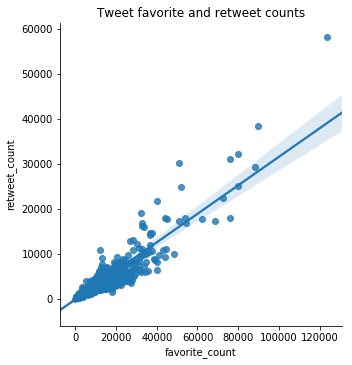

In [91]:
sns.lmplot(x='favorite_count',y='retweet_count',data=merged);
plt.title('Tweet favorite and retweet counts')
fig1= plt.gcf()
fig1.savefig('output1.png',bbox_inches='tight');

### Insight 2: A higher rating suggest a greater number of retweets

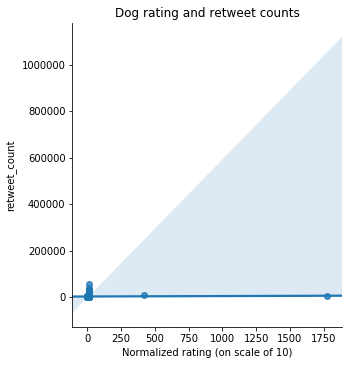

In [92]:
# get a time series 
subset = merged[['timestamp','retweet_count','favorite_count','rating_numerator','rating_denominator']].copy()
# add one column called rating to calculate the normalzied rating 
subset['rating']=subset['rating_numerator']/merged['rating_denominator']*10

sns.lmplot(x='rating',y='retweet_count',data=subset);
plt.title('Dog rating and retweet counts')
plt.xlabel('Normalized rating (on scale of 10)')
fig2 = plt.gcf()
fig2.savefig('output2.png',bbox_inches='tight');

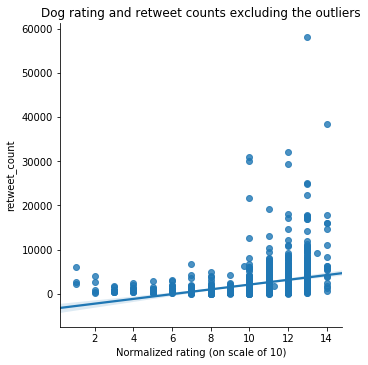

In [93]:
# we try to exclude the higher ratings and see if there is a stronger relationship between rating and retweet count
sns.lmplot(x='rating',y='retweet_count',data=subset[subset.rating<100]);
plt.title('Dog rating and retweet counts excluding the outliers')
plt.xlabel('Normalized rating (on scale of 10)')
fig3 = plt.gcf()
fig3.savefig('output3.png',bbox_inches='tight');

### Insight 3: Average dog ratings has improved over time. 

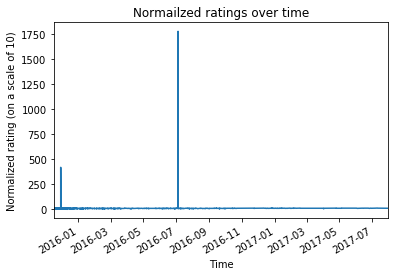

In [94]:
# set time as index
subset.set_index('timestamp',inplace=True)

subset['rating'].plot()
plt.title('Normailzed ratings over time')
plt.xlabel('Time')
plt.ylabel('Normalized rating (on a scale of 10)')
fig4 = plt.gcf()
fig4.savefig('output4.png',bbox_inches='tight');

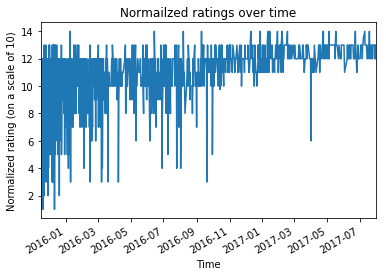

In [95]:
# we try to exclude the higher ratings and see if there is a more obvious change in rating over time 
subset[subset['rating']<100]['rating'].plot()
plt.title('Normailzed ratings over time')
plt.xlabel('Time')
plt.ylabel('Normalized rating (on a scale of 10)')
fig5 = plt.gcf()
fig5.savefig('output5.png',bbox_inches='tight');